In [2]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

random_state = 42

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

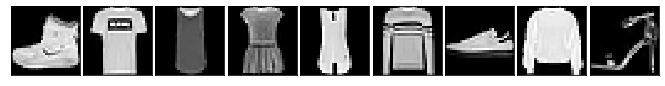

In [4]:
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05,
                    wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gray')

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)) / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)) / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:

model = Sequential()

# 入力画像 28x28x1 (縦の画素数)x(横の画素数)x(チャンネル数)
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',kernel_initializer='he_normal', input_shape=(28, 28, 1)))  # 28x28x1 -> 24x24x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 24x24x16 -> 12x12x16
model.add(Conv2D(64, kernel_size=(5, 5), activation='relu',kernel_initializer='he_normal'))  # 12x12x16 -> 8x8x64
model.add(MaxPooling2D(pool_size=(2, 2)))  # 8x8x64 -> 4x4x64

model.add(Flatten())  # 4x4x64-> 1024
model.add(Dense(10, activation='softmax'))  # 1024 -> 10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`


In [9]:

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [13]:
early_stopping = EarlyStopping(patience=1, verbose=1)
model.fit(x=x_train, y=y_train, batch_size=128, epochs=100, verbose=1,
          validation_data=(x_test, y_test), callbacks=[early_stopping])

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 4s 63us/step - loss: 0.5332 - acc: 0.8108 - val_loss: 0.3849 - val_acc: 0.8658
Epoch 2/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.3452 - acc: 0.8762 - val_loss: 0.3492 - val_acc: 0.8687
Epoch 3/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2996 - acc: 0.8926 - val_loss: 0.3379 - val_acc: 0.8773
Epoch 4/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2737 - acc: 0.9015 - val_loss: 0.3081 - val_acc: 0.8871
Epoch 5/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2510 - acc: 0.9089 - val_loss: 0.3034 - val_acc: 0.8928
Epoch 6/100
60000/60000 [==============================] - 1s 23us/step - loss: 0.2368 - acc: 0.9146 - val_loss: 0.2847 - val_acc: 0.9007
Epoch 7/100
60000/60000 [==============================] - 1s 22us/step - loss: 0.2229 - acc: 0.9204 - val_loss: 0.2791 - 

In [10]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

x_train = x_train.astype('float32')/255
y_train = np.eye(10)[y_train.astype('int32').flatten()]

x_test = x_test.astype('float32')/255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=10000)

In [11]:
x_train.shape

(40000, 32, 32, 3)

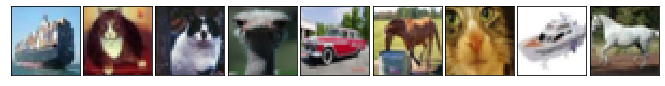

In [12]:
fig = plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)

for i in range(9):
    ax=fig.add_subplot(1,9,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i])

In [14]:
model=Sequential()

model.add(Conv2D(6,kernel_size=(5,5),activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size=(2,2))) #28*28*6 ->14*14*6
model.add(Conv2D(16,kernel_size=(5,5),activation='relu',kernel_initializer='he_normal'))#14*14*6->10*10*16
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(120,activation='relu',kernel_initializer='he_normal'))#400->120
model.add(Dense(84,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='softmax'))#84->10

model.compile(loss=keras.losses.categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

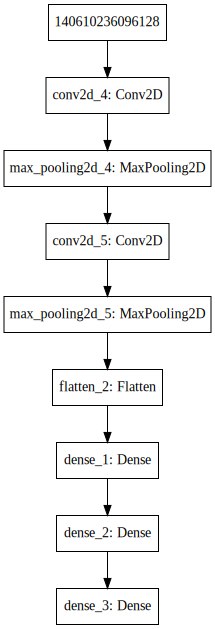

In [20]:
import pydot
import graphviz
SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [21]:
early_stopping=EarlyStopping(patience=1,verbose=1)
model.fit(x=x_train,y=y_train,batch_size=128,epochs=100,verbose=1,validation_data=(x_valid,y_valid),callbacks=[early_stopping])

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 6s 146us/step - loss: 1.7604 - acc: 0.3553 - val_loss: 1.5377 - val_acc: 0.4489
Epoch 2/100
40000/40000 [==============================] - 1s 24us/step - loss: 1.4562 - acc: 0.4726 - val_loss: 1.4799 - val_acc: 0.4740
Epoch 3/100
40000/40000 [==============================] - 1s 23us/step - loss: 1.3442 - acc: 0.5144 - val_loss: 1.3428 - val_acc: 0.5233
Epoch 4/100
40000/40000 [==============================] - 1s 23us/step - loss: 1.2650 - acc: 0.5456 - val_loss: 1.3318 - val_acc: 0.5220
Epoch 5/100
40000/40000 [==============================] - 1s 23us/step - loss: 1.2132 - acc: 0.5669 - val_loss: 1.2876 - val_acc: 0.5476
Epoch 6/100
40000/40000 [==============================] - 1s 24us/step - loss: 1.1685 - acc: 0.5818 - val_loss: 1.2322 - val_acc: 0.5670
Epoch 7/100
40000/40000 [==============================] - 1s 24us/step - loss: 1.1207 - acc: 0.6025 - val_loss: 1.2242 -

In [25]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

x_train=x_train.astype('float32')/255
y_train=np.eye(10)[y_train.astype('int32').flatten()]

x_test=x_test.astype('float32')/255
y_test=np.eye(10)[y_test.astype('int32').flatten()]

x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=10000)


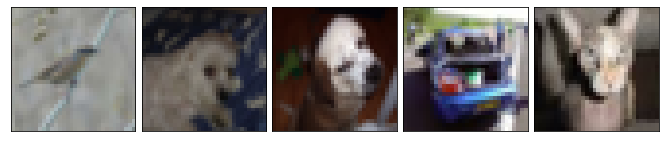

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

fig=plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)

for i in range(5):
    ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
    ax.imshow(x_train[i])

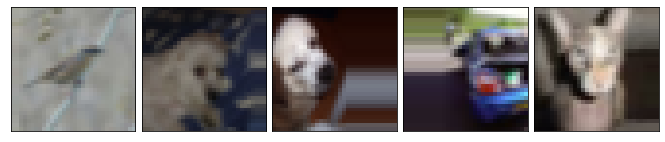

In [27]:
datagen=ImageDataGenerator(width_shift_range=0.4)

datagen.fit(x_train)

fig=plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9,shuffle=False):
    for i in range(5):
        ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
        ax.imshow(x_batch[i])
    break

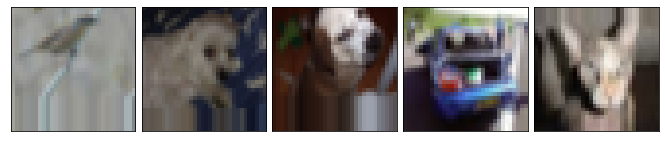

In [28]:
datagen=ImageDataGenerator(height_shift_range=0.4)

datagen.fit(x_train)

fig=plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9,shuffle=False):
    for i in range(5):
        ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
        ax.imshow(x_batch[i])
    break

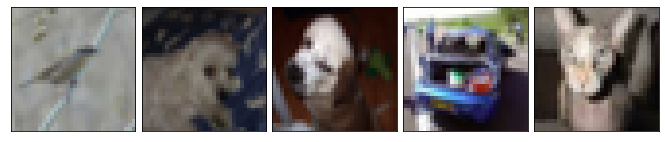

In [29]:
datagen=ImageDataGenerator(horizontal_flip=True)

datagen.fit(x_train)

fig=plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9,shuffle=False):
    for i in range(5):
        ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
        ax.imshow(x_batch[i])
    break

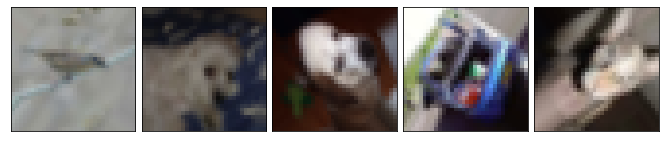

In [32]:
datagen=ImageDataGenerator(rotation_range=60)

datagen.fit(x_train)

fig=plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)

for x_batch,y_batch in datagen.flow(x_train,y_train,batch_size=9,shuffle=False):
    for i in range(5):
        ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
        ax.imshow(x_batch[i])
    break

In [33]:
def normalize(x):
    max_x=np.max(x,axis=(0,1),keepdims=True)
    min_x=np.min(x,axis=(0,1),keepdims=True)
    return (x-min_x)/(max_x-min_x)


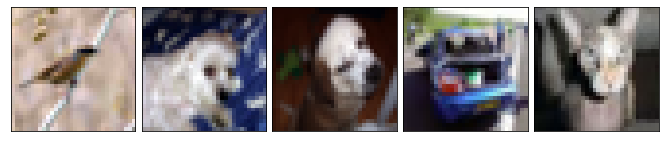

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gcn_whitening=ImageDataGenerator(samplewise_center=True,samplewise_std_normalization=True)

gcn_whitening.fit(x_train)

fig = plt.figure(figsize=(9,15))
fig.subplots_adjust(left=0,right=1,bottom=0,top=0.5,hspace=0.05,wspace=0.05)

for x_batch,y_batch in gcn_whitening.flow(x_train,y_train,batch_size=9,shuffle=False):
    for i in range(5):
        ax=fig.add_subplot(1,5,i+1,xticks=[],yticks=[])
        ax.imshow(normalize(x_batch[i]))
    break

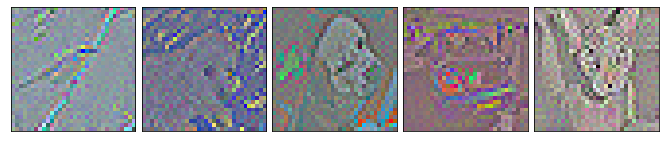

In [35]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

zca_whitening = ImageDataGenerator(zca_whitening=True)

zca_whitening.fit(x_train)

fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0,top=0.5, hspace=0.05, wspace=0.05)

for x_batch, y_batch in zca_whitening.flow(x_train, y_train, batch_size=9, shuffle=False):
    for i in range(5):
        ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
        ax.imshow(normalize(x_batch[i]))
    break

In [38]:
def resblock(x,filters=64,kernel_size=(3,3)):
    x_=Conv2D(filters,kernel_size,padding='same')(x)
    x_=BatchNormalization()(x_)
    x_=Conv2D(filters,kernel_size,padding='same')(x_)
    x=Add()([x_,x])
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    return x

from keras import backend as K

inputs =Input(shape=(32,32,3))

x=Conv2D(64,kernel_size=(5,5),padding='same',activation='relu')(inputs)
x=resblock(x)
x=resblock(x)
x=resblock(x)
x=Flatten()(x)
y=Dense(10,activation='softmax')(x)

model =Model(inputs=inputs,outputs=y)
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,batch_size=128,epochs=3,verbose=1)

Epoch 1/3
40000/40000 [==============================] - 20s 489us/step - loss: 14.4680 - acc: 0.0999
Epoch 2/3
40000/40000 [==============================] - 19s 468us/step - loss: 14.5043 - acc: 0.1001
Epoch 3/3
40000/40000 [==============================] - 19s 469us/step - loss: 14.5043 - acc: 0.1001


In [39]:
from tensorflow.keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')
weights = [com.get_weights() for com in model.layers[1:]]
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3))) # 32x32x3 -> 30x30x64
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu')) # 30x30x64 -> 28x28x64
model.add(MaxPooling2D(pool_size=(2, 2))) # 28x28x64 -> 14x14x64

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 14x14x64 -> 12x12x128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu')) # 12x12x128 -> 10x10x128
model.add(MaxPooling2D(pool_size=(2, 2))) # 10x10x128 -> 5x5x128

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

# weightの初期化
model.layers[0].set_weights(weights[0])
model.layers[1].set_weights(weights[1])
model.layers[3].set_weights(weights[3])
model.layers[4].set_weights(weights[4])

553467904/553467096 [==============================] - 127s 0us/step


In [3]:
%matplotlib inline

import os

import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, Activation, add, Add, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot
from tensorflow.keras.preprocessing.image import ImageDataGenerator

random_state = 42

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255
y_train = np.eye(10)[y_train.astype('int32').flatten()]#onehotvectorにへんこう

x_test = x_test.astype('float32') / 255
y_test = np.eye(10)[y_test.astype('int32').flatten()]

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train, y_train, test_size=10000)

In [8]:

model = Sequential()

model.add(Conv2D(6, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal', input_shape=(32, 32, 3)))  # 32x32x3 -> 28x28x6
model.add(MaxPooling2D(pool_size=(2, 2)))  # 28x28x6 -> 14x14x6
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu',
                 kernel_initializer='he_normal'))  # 14x14x6 -> 10x10x16
model.add(MaxPooling2D(pool_size=(2, 2)))  # 10x10x16 -> 5x5x16

model.add(Flatten())  # 5x5x16 -> 400
model.add(Dense(120, activation='relu',
                kernel_initializer='he_normal'))  # 400 ->120
model.add(Dense(84, activation='relu', kernel_initializer='he_normal'))  # 120 ->84
model.add(Dense(10, activation='softmax'))  # 84 ->10

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer='adam',
    metrics=['accuracy']
)

In [14]:
datagen = ImageDataGenerator(
    width_shift_range=0.2,  # 3.1.1 左右にずらす
    height_shift_range=0.2,  # 3.1.2 上下にずらす
    horizontal_flip=True,  # 3.1.3 左右反転
    # 3.2.1 Global Contrast Normalization (GCN) (Falseに設定しているのでここでは使用していない)
    samplewise_center=True,
    samplewise_std_normalization=True,
    zca_whitening=False)  # 3.2.2 Zero-phase Component Analysis (ZCA) Whitening (Falseに設定しているのでここでは使用していない)

In [11]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                    steps_per_epoch=x_train.shape[0] // 100, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
400/400 [==============================] - 13s 32ms/step - loss: 1.8868 - acc: 0.3060 - val_loss: 2.1914 - val_acc: 0.1764
Epoch 2/30
400/400 [==============================] - 12s 30ms/step - loss: 1.6490 - acc: 0.3939 - val_loss: 2.4174 - val_acc: 0.1282
Epoch 3/30
400/400 [==============================] - 12s 30ms/step - loss: 1.5582 - acc: 0.4334 - val_loss: 2.4838 - val_acc: 0.1165
Epoch 4/30
400/400 [==============================] - 12s 30ms/step - loss: 1.4897 - acc: 0.4621 - val_loss: 2.6261 - val_acc: 0.1170
Epoch 5/30
400/400 [==============================] - 12s 30ms/step - loss: 1.4479 - acc: 0.4777 - val_loss: 2.8554 - val_acc: 0.1110
Epoch 6/30
400/400 [==============================] - 12s 30ms/step - loss: 1.4153 - acc: 0.4943 - val_loss: 2.7018 - val_acc: 0.1166
Epoch 7/30
400/400 [==============================] - 12s 30ms/step - loss: 1.3805 - acc: 0.5081 - val_loss: 2.8504 - val_acc: 0.1158
Epoch 8/30
400/400 [==============================] - 12s 30ms

In [13]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                    steps_per_epoch=x_train.shape[0] // 100, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
400/400 [==============================] - 10s 26ms/step - loss: 1.2307 - acc: 0.5668 - val_loss: 2.7187 - val_acc: 0.3194
Epoch 2/30
400/400 [==============================] - 10s 26ms/step - loss: 1.1252 - acc: 0.6011 - val_loss: 4.0917 - val_acc: 0.2659
Epoch 3/30
400/400 [==============================] - 10s 26ms/step - loss: 1.1043 - acc: 0.6079 - val_loss: 3.5983 - val_acc: 0.2779
Epoch 4/30
400/400 [==============================] - 10s 26ms/step - loss: 1.0943 - acc: 0.6126 - val_loss: 3.6682 - val_acc: 0.2779
Epoch 5/30
400/400 [==============================] - 11s 27ms/step - loss: 1.0882 - acc: 0.6124 - val_loss: 4.3795 - val_acc: 0.2354
Epoch 6/30
400/400 [==============================] - 10s 26ms/step - loss: 1.0826 - acc: 0.6164 - val_loss: 4.3571 - val_acc: 0.2605
Epoch 7/30
400/400 [==============================] - 10s 26ms/step - loss: 1.0733 - acc: 0.6161 - val_loss: 3.7606 - val_acc: 0.2804
Epoch 8/30
400/400 [==============================] - 10s 26ms

In [15]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                    steps_per_epoch=x_train.shape[0] // 100, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
400/400 [==============================] - 12s 30ms/step - loss: 1.2409 - acc: 0.5856 - val_loss: 2.2073 - val_acc: 0.2426
Epoch 2/30
400/400 [==============================] - 12s 31ms/step - loss: 1.1111 - acc: 0.6124 - val_loss: 2.2824 - val_acc: 0.2290
Epoch 3/30
400/400 [==============================] - 12s 31ms/step - loss: 1.0854 - acc: 0.6189 - val_loss: 2.4241 - val_acc: 0.2189
Epoch 4/30
400/400 [==============================] - 12s 31ms/step - loss: 1.0630 - acc: 0.6234 - val_loss: 2.9178 - val_acc: 0.1920
Epoch 5/30
400/400 [==============================] - 12s 30ms/step - loss: 1.0567 - acc: 0.6281 - val_loss: 2.5803 - val_acc: 0.2118
Epoch 6/30
400/400 [==============================] - 12s 30ms/step - loss: 1.0480 - acc: 0.6288 - val_loss: 2.5510 - val_acc: 0.1982
Epoch 7/30
400/400 [==============================] - 12s 30ms/step - loss: 1.0440 - acc: 0.6344 - val_loss: 3.3992 - val_acc: 0.1816
Epoch 8/30
400/400 [==============================] - 13s 32ms

In [17]:
def resblock(x, filters=6, kernel_size=(5, 5)):
    x_ = Conv2D(filters, kernel_size, padding='same')(x)
    x_ = BatchNormalization()(x_)
    x_ = Conv2D(filters, kernel_size, padding='same')(x_)
    x = Add()([x_, x])
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

from keras import backend as K

inputs = Input(shape=(32, 32, 3))

x = Conv2D(6, kernel_size=(5, 5),kernel_initializer='he_normal',activation='relu')(inputs)
#x = resblock(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(16,kernel_size=(5, 5),kernel_initializer='he_normal',activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu',kernel_initializer='he_normal')(x)
x = Dense(84, activation='relu', kernel_initializer='he_normal')(x)
y = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=y)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                    steps_per_epoch=x_train.shape[0] // 100, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
400/400 [==============================] - 12s 31ms/step - loss: 1.8088 - acc: 0.3456 - val_loss: 2.2353 - val_acc: 0.1405
Epoch 2/30
400/400 [==============================] - 12s 31ms/step - loss: 1.5774 - acc: 0.4288 - val_loss: 2.2422 - val_acc: 0.1645
Epoch 3/30
400/400 [==============================] - 12s 31ms/step - loss: 1.4783 - acc: 0.4678 - val_loss: 2.0998 - val_acc: 0.2387
Epoch 4/30
400/400 [==============================] - 12s 31ms/step - loss: 1.4137 - acc: 0.4910 - val_loss: 2.0634 - val_acc: 0.2737
Epoch 5/30
400/400 [==============================] - 12s 31ms/step - loss: 1.3672 - acc: 0.5111 - val_loss: 2.0750 - val_acc: 0.2581
Epoch 6/30
400/400 [==============================] - 12s 30ms/step - loss: 1.3318 - acc: 0.5229 - val_loss: 2.2507 - val_acc: 0.1755
Epoch 7/30
400/400 [==============================] - 12s 30ms/step - loss: 1.3077 - acc: 0.5333 - val_loss: 2.2770 - val_acc: 0.1589
Epoch 8/30
400/400 [==============================] - 12s 30ms

In [ ]:
def resblock(x, filters=6, kernel_size=(5, 5)):
    x_ = Conv2D(filters, kernel_size, padding='same')(x)
    x_ = BatchNormalization()(x_)
    x_ = Conv2D(filters, kernel_size, padding='same')(x_)
    x = Add()([x_, x])
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    return x

from keras import backend as K

inputs = Input(shape=(32, 32, 3))

x = Conv2D(6, kernel_size=(5, 5),kernel_initializer='he_normal',activation='relu')(inputs)
#x = resblock(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(16,kernel_size=(5, 5),kernel_initializer='he_normal',activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Dense(120, activation='relu',kernel_initializer='he_normal')(x)
x = Dense(84, activation='relu', kernel_initializer='he_normal')(x)
y = Dense(10, activation='softmax')(x)

model = Model(inputs=inputs, outputs=y)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy', metrics=['accuracy'])
model.fit_generator(datagen.flow(x_train, y_train, batch_size=100),
                    steps_per_epoch=x_train.shape[0] // 100, epochs=30, validation_data=(x_valid, y_valid))

Epoch 1/30
400/400 [==============================] - 13s 32ms/step - loss: 1.8281 - acc: 0.3438 - val_loss: 2.1008 - val_acc: 0.2512
Epoch 2/30
400/400 [==============================] - 12s 31ms/step - loss: 1.5385 - acc: 0.4421 - val_loss: 2.0277 - val_acc: 0.2901
Epoch 3/30
400/400 [==============================] - 12s 31ms/step - loss: 1.4382 - acc: 0.4848 - val_loss: 2.0797 - val_acc: 0.2184
Epoch 4/30
400/400 [==============================] - 12s 31ms/step - loss: 1.3776 - acc: 0.5075 - val_loss: 2.0324 - val_acc: 0.2432
Epoch 5/30
400/400 [==============================] - 12s 30ms/step - loss: 1.3320 - acc: 0.5249 - val_loss: 2.0407 - val_acc: 0.2132
Epoch 6/30
400/400 [==============================] - 12s 30ms/step - loss: 1.2948 - acc: 0.5369 - val_loss: 1.9539 - val_acc: 0.3017
Epoch 7/30
400/400 [==============================] - 12s 30ms/step - loss: 1.2678 - acc: 0.5471 - val_loss: 2.0997 - val_acc: 0.1867
Epoch 8/30
357/400 [=========================>....] - ETA: 1s 